<a href="https://colab.research.google.com/github/kardihaekal/sentiment-analyst-kanjuruhan/blob/master/visualisasi_sentimen_kanjuruhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd

def load_data():
  data = pd.read_csv('/content/sample_data/hasil_lexiconbased.csv')
  return data

In [13]:
df = load_data()
df.head()

,Nomor,Name,Comment,Compound_Score,Sentiments
0,1,sintaadela,Pa sigit banyak bgt cobaannya ya😢 yg sebelah j...,-0.4767,Negatif
1,2,hbbl.hsn,"Masih kurang banyak, para polisi yang berada d...",0.0000,Netral
2,3,dhatmoko16,@hbbl.hsn yes.. apalagi ada dipintu 13... Hati...,0.4019,Positif
3,4,gal.gale,Mantu idaman,0.0000,Netral
4,5,r_diiit,Sambo gmn min sambo,0.0000,Netral


34837


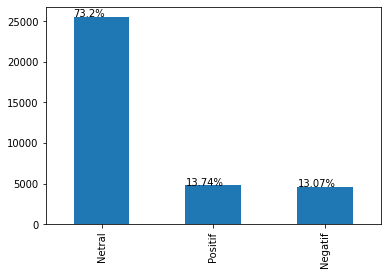

In [14]:
s = pd.value_counts(df['Sentiments'])
ax = s.plot.bar()
n = len(df.index)
print (n)
for p in ax.patches:
  ax.annotate(str(round(p.get_height() / n * 100, 2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.005))

In [15]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

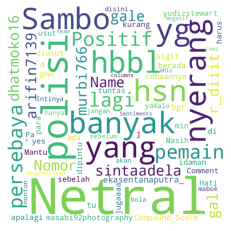

In [17]:
#wordcloud keseluruhan data
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(df))
#plot wordcloud
fig = plt.Figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

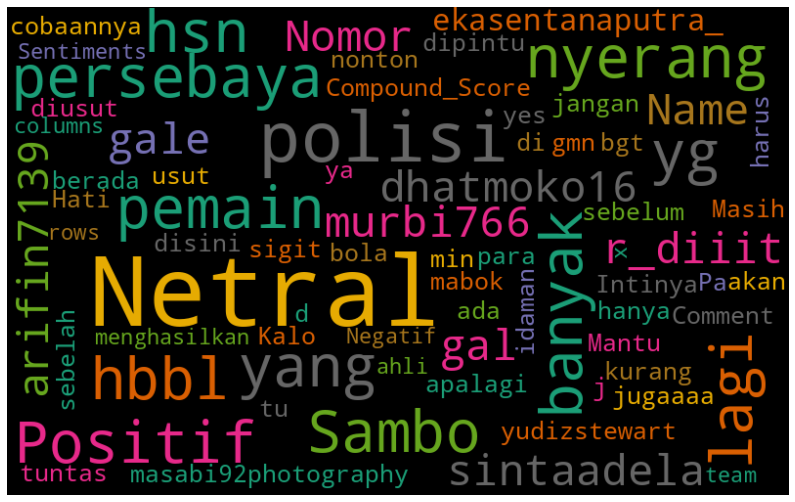

In [23]:
#wordcloud sentimen positif
def generate_wordcloud(all_words):
  global WordCloud
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100,
                        relative_scaling=0.5, colormap='Dark2').generate(str(df))
  
  plt.figure(figsize=(14,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ' '.join([text for text in df['Comment'][df.Sentiments == 'Positif']])
generate_wordcloud(all_words)

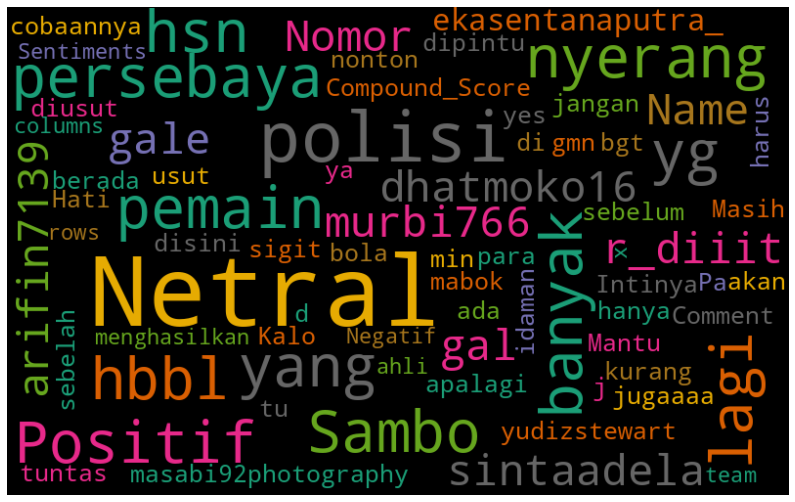

In [25]:
#wordcloud sentimen Netral
all_words = ' '.join([text for text in df['Comment'][df.Sentiments == 'Netral']])
generate_wordcloud(all_words)

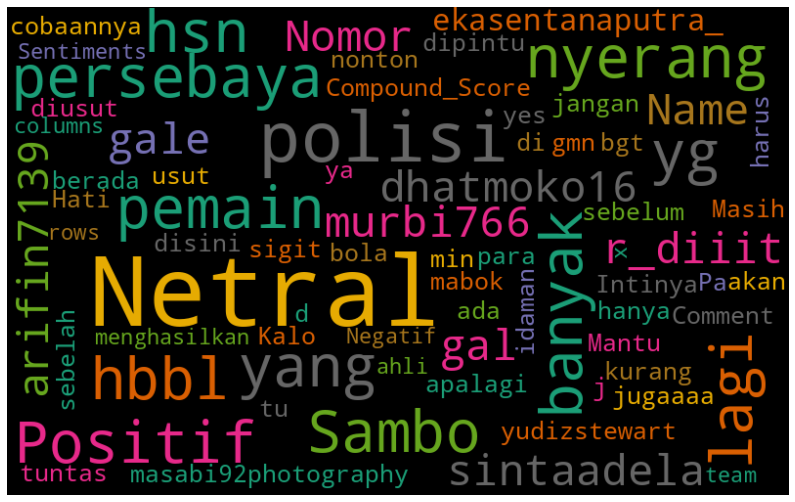

In [26]:
#wordcloud sentimen negatif
all_words = ' '.join([text for text in df['Comment'][df.Sentiments == 'Negatif']])
generate_wordcloud(all_words)

## PROSES PERHITUNGAN AKURASI

In [27]:
!pip install VaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 10.0 MB/s eta 0:00:00


In [28]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from openpyxl import Workbook

In [29]:
analyser = SentimentIntensityAnalyzer()

In [30]:
pip install openpyxl==3.0.10

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
#masukkan data label manual (bikin lagi buat dibandingin sama data yg pertama)
dataset = pd.read_csv('/content/sample_data/Dataset-Kanjuruhan.csv')
dataset.head()

,Nomor,Name,Comment
0,1,sintaadela,Pa sigit banyak bgt cobaannya ya😢 yg sebelah j...
1,2,hbbl.hsn,"Masih kurang banyak, para polisi yang berada d..."
2,3,dhatmoko16,@hbbl.hsn yes.. apalagi ada dipintu 13... Hati...
3,4,gal.gale,Mantu idaman
4,5,r_diiit,Sambo gmn min sambo


In [35]:
scores = [analyser.polarity_scores(x) for x in dataset['Comment']]
dataset['Compound_Score'] = [x['compound'] for x in scores]
dataset.head()

,Nomor,Name,Comment,Compound_Score
0,1,sintaadela,Pa sigit banyak bgt cobaannya ya😢 yg sebelah j...,-0.4767
1,2,hbbl.hsn,"Masih kurang banyak, para polisi yang berada d...",0.0000
2,3,dhatmoko16,@hbbl.hsn yes.. apalagi ada dipintu 13... Hati...,0.4019
3,4,gal.gale,Mantu idaman,0.0000
4,5,r_diiit,Sambo gmn min sambo,0.0000


In [36]:
dataset.loc[dataset['Compound_Score'] < 0, 'Sentiments'] = 'Negatif'
dataset.loc[dataset['Compound_Score'] == 0, 'Sentiments'] = 'Netral'
dataset.loc[dataset['Compound_Score'] > 0, 'Sentiments'] = 'Positif'
dataset.head(100)

,Nomor,Name,Comment,Compound_Score,Sentiments
0,1,sintaadela,Pa sigit banyak bgt cobaannya ya😢 yg sebelah j...,-0.4767,Negatif
1,2,hbbl.hsn,"Masih kurang banyak, para polisi yang berada d...",0.0000,Netral
2,3,dhatmoko16,@hbbl.hsn yes.. apalagi ada dipintu 13... Hati...,0.4019,Positif
3,4,gal.gale,Mantu idaman,0.0000,Netral
4,5,r_diiit,Sambo gmn min sambo,0.0000,Netral
...,...,...,...,...,...
95,96,torosutoro3,Kayak gini faktanya katanya Kapolda polisi pel...,0.9468,Positif
96,97,dckysty_,@torosutoro3 Prosedur 😢,-0.4767,Negatif
97,98,ryuu.zet,@somvchhate hahahahaha duid mas ! Kalo ada dui...,0.4926,Positif
98,99,nanangsand_,@torosutoro3 hanya oknum😢,-0.4767,Negatif


## CONFUSION MATRIX

In [37]:
from sklearn import metrics

In [41]:
print(metrics.classification_report(dataset['Sentiments'], dataset['Sentiments']))

              precision    recall  f1-score   support

     Negatif       1.00      1.00      1.00      4552
      Netral       1.00      1.00      1.00     25500
     Positif       1.00      1.00      1.00      4785

    accuracy                           1.00     34837
   macro avg       1.00      1.00      1.00     34837
weighted avg       1.00      1.00      1.00     34837

